In [3]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from sklearn import metrics

In [4]:
dataset = pd.read_csv("/content/drive/MyDrive/class_7_wine_dataset_v2.csv")
dataset.shape

(6497, 15)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6497 non-null   int64  
 1   type                  6497 non-null   object 
 2   fixed acidity         6487 non-null   float64
 3   volatile acidity      6489 non-null   float64
 4   citric acid           6494 non-null   float64
 5   residual sugar        6495 non-null   float64
 6   chlorides             6495 non-null   float64
 7   free sulfur dioxide   6497 non-null   float64
 8   total sulfur dioxide  6497 non-null   float64
 9   density               6497 non-null   float64
 10  pH                    6488 non-null   float64
 11  sulphates             6493 non-null   float64
 12  alcohol               6497 non-null   float64
 13  quality               6497 non-null   int64  
 14  vendor_id             6497 non-null   int64  
dtypes: float64(11), int64

In [6]:
dataset.head()

,Unnamed: 0,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,vendor_id
0,0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,369
1,1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,361
2,2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,354
3,3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,325
4,4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,375


[3 4 5 6 7 8 9]


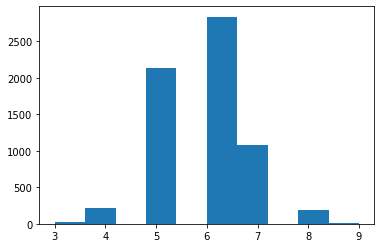

In [7]:
quality = dataset.quality.to_numpy()
fig, axl = plt.subplots(1, 1)
axl.hist(quality)
print(np.unique(quality))

In [8]:
dataset['quality_label'] = dataset['quality'].apply(lambda label: 0 if label<=6 else 1)
print(len(dataset[dataset["quality_label"] == 0]))
print(len(dataset[dataset["quality_label"] == 1]))

5220
1277


## Limpiar el dataset

In [9]:
nans = dataset[dataset.isna().sum(axis=1) >= 1]
print(nans.shape)

(34, 16)


In [10]:
ds = dataset[dataset.isna().sum(axis=1) == 0]
ds.shape

(6463, 16)

In [11]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

## Ingenieria de features

In [12]:
print(ds.type.unique())

['white' 'red']


In [13]:
type_dummies = pd.get_dummies(ds["type"], prefix="type")
ds = pd.concat([ds, type_dummies], axis=1)

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            6463 non-null   int64  
 1   type                  6463 non-null   object 
 2   fixed acidity         6463 non-null   float64
 3   volatile acidity      6463 non-null   float64
 4   citric acid           6463 non-null   float64
 5   residual sugar        6463 non-null   float64
 6   chlorides             6463 non-null   float64
 7   free sulfur dioxide   6463 non-null   float64
 8   total sulfur dioxide  6463 non-null   float64
 9   density               6463 non-null   float64
 10  pH                    6463 non-null   float64
 11  sulphates             6463 non-null   float64
 12  alcohol               6463 non-null   float64
 13  quality               6463 non-null   int64  
 14  vendor_id             6463 non-null   int64  
 15  quality_label        

In [15]:
print(ds.vendor_id.unique())

[369 361 354 325 375 380 312 301 355 290 210 260 421 248 416 383 277 586
 413 559 234 317 318 353 305 470 381 347 396 243 232 200 358 256 374 384
 357 393 462 143 252 329 257 389 469 459 335 334 359 306 323 339 209 379
 373 203 464 276 233 288 230 331 536 254 401 478 247 348 321 206 316 268
 365 322 261 367 215 438 496 482 399 417 270 214 241 263 274 326 286 275
 279 132 385 307 218 223 352 308 471 461 269 449 265 228 445 299 345 320
 313 190 466 300 409 372 398 227 440 573 578 486 244 212 294 497 262 392
 150 196 239 194 250 351 287 245 272 506 180 390 253 282 222 235 264 266
 292 157 137 415 324 240 258 350 284 340 207 182 314 338 433 201 432 311
 437 441 439 105  72  80 360 403 114 273 395 309 291 249 140 518 562 152
 226 315 457 434 447 302 455   2 337 344 493 304 410 531 224 378 343 456
 205 208 229 570 356 293 473 425 371 362 465 450 479 332 342 382 238 430
 213 458 487 404 341 454 204 394 271 246 297 333 446 242 283 414 185 548
 540 566 336  40 211 485 220 412 391 397 387 368 30

In [16]:
corr = ds.loc[:, (ds.columns != "vendor_id") & (ds.columns != "type") & (ds.columns != "quality_label")].corr()

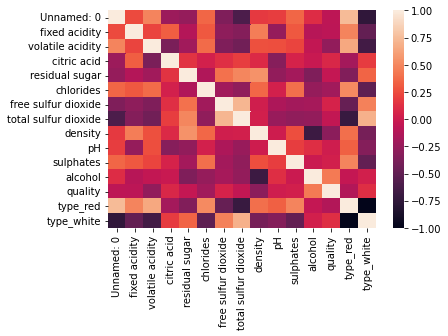

In [17]:
fig, ax = plt.subplots(1,1)
import seaborn as sns
sns.heatmap(corr)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


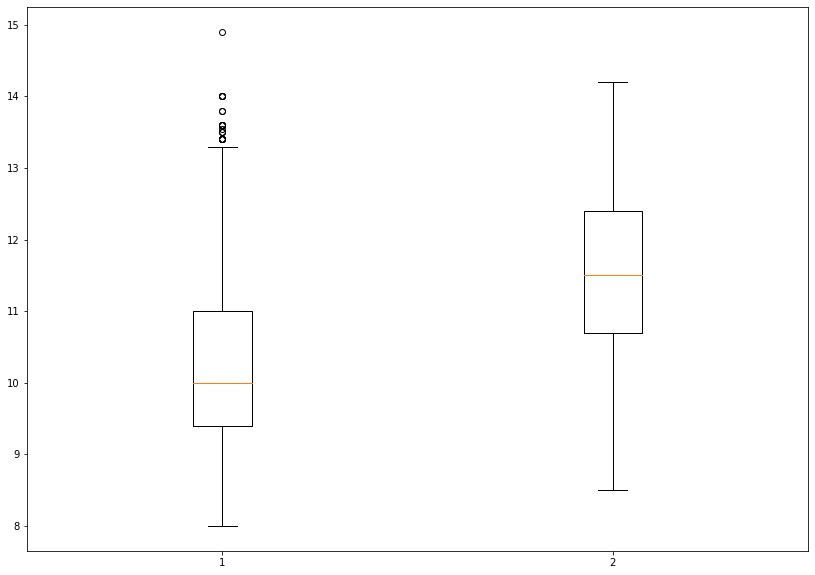

In [18]:
fig, ax =  plt.subplots(1,1 , figsize=(14, 10))
_ = ax.boxplot([ds[ds["quality_label"] == 0]["alcohol"], ds[ds["quality_label"] == 1]["alcohol"]])

In [19]:
vendor_id =  ds["vendor_id"]
quality_label = ds["quality_label"]
final_ds = ds.drop(columns=["Unnamed: 0", "quality_label", "quality", "vendor_id", "type"])

In [20]:
final_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  type_red              6463 non-null   uint8  
 12  type_white            6463 non-null   uint8  
dtypes: float64(11), uint8(2)
memory usage: 618.5 KB


## Normalizar

In [21]:
nds = (final_ds - np.min(final_ds, axis=0)) / (np.max(final_ds, axis=0) - np.min(final_ds, axis=0))
print(np.max(nds, axis=0))
print(np.min(nds, axis=0)) 

fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
type_red                1.0
type_white              1.0
dtype: float64
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
type_red                0.0
type_white              0.0
dtype: float64


## Split

In [22]:
nds = nds.to_numpy()
quality_label =  quality_label.to_numpy()

n =  nds.shape[0]
idx = np.random.permutation(np.arange(0, n))
train_idx = idx[:int(0.85 * n)]
val_idx = idx[int(0.85*n):]
assert len(idx) == len(train_idx) + len(val_idx)

In [23]:
y_train =  quality_label[train_idx]
x_train = nds[train_idx, :]

x_val = nds[val_idx, :]
y_val = quality_label[val_idx]

In [24]:
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"x_val shape {x_val.shape}")
print(f"y_val shape {y_val.shape}")

x_train shape (5493, 13)
y_train shape (5493,)
x_val shape (970, 13)
y_val shape (970,)


## NNet sin embeddings

In [25]:
import torch
from torch.utils.data import Dataset, DataLoader


In [26]:
class CustomDataset(Dataset):
  
  def __init__(self, X, y):
    super().__init__()
    self.X = X
    self.y = y
  
  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self, idx):
    return self.X[idx], self.y[idx]

In [27]:
train = CustomDataset(x_train, y_train)
val = CustomDataset(x_val, y_val)

In [28]:
print(train[0])
print(type(train[0]))
print(train[0][0])
print(type(train[0][0]))
print(train[0][1])
print(train[0][0].shape)
print(train[0][1].shape)

print(train[0][0].dtype)
print(train[0][1].dtype)


(array([0.17355372, 0.12      , 0.15060241, 0.18251534, 0.04152824,
       0.12847222, 0.33640553, 0.20416426, 0.47286822, 0.11797753,
       0.20289855, 0.        , 1.        ]), 0)
<class 'tuple'>
[0.17355372 0.12       0.15060241 0.18251534 0.04152824 0.12847222
 0.33640553 0.20416426 0.47286822 0.11797753 0.20289855 0.
 1.        ]
<class 'numpy.ndarray'>
0
(13,)
()
float64
int64


In [29]:
train_dataloader = DataLoader(train, batch_size=128, shuffle=True)
val_dataloader = DataLoader(val, batch_size=128, shuffle=True)

In [30]:
x, y  = next(iter(train_dataloader))
print(x)
print(y)

print(x.dtype)
print(y.dtype)

print(x.shape)
print(y.shape)


tensor([[0.2645, 0.1600, 0.1627,  ..., 0.6667, 0.0000, 1.0000],
        [0.2975, 0.1333, 0.2530,  ..., 0.1594, 0.0000, 1.0000],
        [0.2231, 0.1000, 0.2711,  ..., 0.4783, 0.0000, 1.0000],
        ...,
        [0.2314, 0.2067, 0.2349,  ..., 0.1304, 0.0000, 1.0000],
        [0.4380, 0.1667, 0.2289,  ..., 0.2174, 0.0000, 1.0000],
        [0.2727, 0.4467, 0.0060,  ..., 0.6957, 1.0000, 0.0000]],
       dtype=torch.float64)
tensor([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])
torch.float64
torch.int64
torch.Size([128, 13])
torch.Size([128])


In [31]:
class NNet(torch.nn.Module):

  def __init__(self):
    super().__init__()
    self.linear_1 = torch.nn.Linear(in_features=13, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.linear_3 = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  def forward(self, x):
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.linear_3(x)
    return x



In [32]:
nnet = NNet()
print(nnet)

NNet(
  (linear_1): Linear(in_features=13, out_features=200, bias=True)
  (relu_1): ReLU()
  (linear_2): Linear(in_features=200, out_features=100, bias=True)
  (relu_2): ReLU()
  (linear_3): Linear(in_features=100, out_features=1, bias=True)
)


In [33]:
optimizer = torch.optim.Adam(nnet.parameters(), lr=0.01)
loss_function = torch.nn.BCEWithLogitsLoss(reduction="sum")

In [38]:
device = ""
if torch.cuda.is_available():
    device = "cuda:0"
else:
    device = "cpu"

nnet.to(device)

auc_train_list = []
auc_val_list = []
for epoch in range(500):

    running_train_loss = 0
    running_val_loss = 0
    running_y_score = []
    running_y_truth = []

    #### TRAINING ####

    nnet.train()

    for i, data in enumerate(train_dataloader):

        # data del batch
        X, y = data
        X = X.to(device).float()
        y = y.to(device).float().reshape(-1,1)

        # forward
        optimizer.zero_grad()
        y_hat = nnet(X)
        y_score = torch.sigmoid(y_hat)

        # backward
        loss = loss_function(y_hat, y)
        loss.backward()
        optimizer.step()

        # metrics
        running_train_loss += loss.item() 
        running_y_score += list(y_score.cpu().detach().numpy())
        running_y_truth += list(y.cpu().detach().numpy())

    fpr, tpr, thresholds = metrics.roc_curve(running_y_truth, running_y_score)
    auc_train_value = metrics.auc(fpr, tpr)
    auc_train_list.append(auc_train_value)

    #### VALIDATION ####

    nnet.eval()
    with torch.no_grad():

        for i, data in enumerate(val_dataloader):

            # data del batch
            X, y = data
            X = X.to(device).float()
            y = y.to(device).float().reshape(-1,1)

            # forward
            optimizer.zero_grad()
            y_hat = nnet(X)
            y_score = torch.sigmoid(y_hat)

            # metrics
            running_val_loss += loss.item() 
            running_y_score += list(y_score.cpu().detach().numpy())
            running_y_truth += list(y.cpu().detach().numpy())

        fpr, tpr, thresholds = metrics.roc_curve(running_y_truth, running_y_score)
        auc_val_value = metrics.auc(fpr, tpr)
        auc_val_list.append(auc_val_value)

        print("Epoch: {}/{} - Train loss {:.6f} - Train AUC {:.6f} - Valid Loss {:.6f} - Valid AUC {:.6f}".format(epoch+1, 500, running_train_loss, auc_train_value, running_val_loss, auc_val_value))
         

Epoch: 1/500 - Train loss 2189.571011 - Train AUC 0.805438 - Valid Loss 325.839233 - Valid AUC 0.801676
Epoch: 2/500 - Train loss 2192.975170 - Train AUC 0.804795 - Valid Loss 336.688843 - Valid AUC 0.797126
Epoch: 3/500 - Train loss 2160.536449 - Train AUC 0.812372 - Valid Loss 360.620850 - Valid AUC 0.807558
Epoch: 4/500 - Train loss 2133.682587 - Train AUC 0.817880 - Valid Loss 337.307556 - Valid AUC 0.814490
Epoch: 5/500 - Train loss 2138.785221 - Train AUC 0.815425 - Valid Loss 401.016632 - Valid AUC 0.811561
Epoch: 6/500 - Train loss 2088.785122 - Train AUC 0.828464 - Valid Loss 373.562500 - Valid AUC 0.825282
Epoch: 7/500 - Train loss 2050.483471 - Train AUC 0.836116 - Valid Loss 366.457489 - Valid AUC 0.833910
Epoch: 8/500 - Train loss 2039.089540 - Train AUC 0.838657 - Valid Loss 361.645142 - Valid AUC 0.834995
Epoch: 9/500 - Train loss 2023.811733 - Train AUC 0.841776 - Valid Loss 380.388947 - Valid AUC 0.840130
Epoch: 10/500 - Train loss 2004.982836 - Train AUC 0.845370 - Va

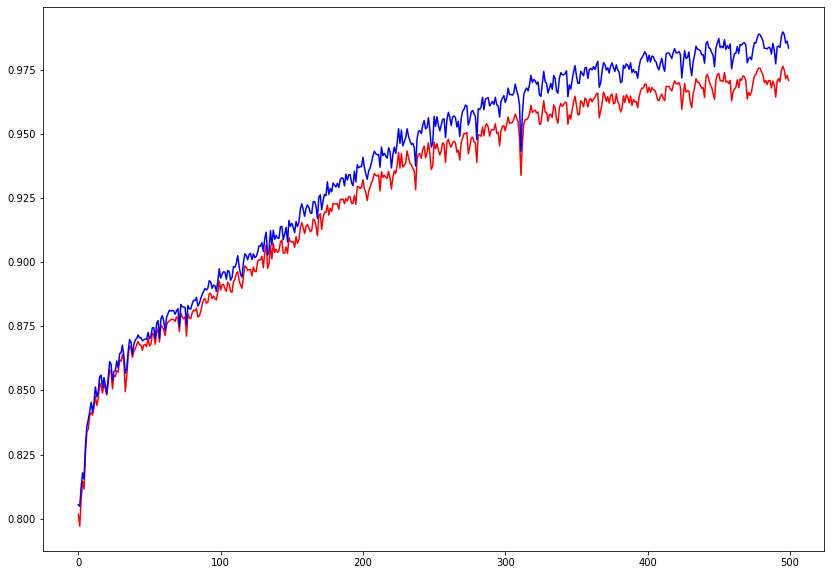

In [39]:
fig, ax1 = plt.subplots(1, figsize=(14, 10))
x = range(0, len(auc_val_list))
ax1.plot(x, auc_val_list, color="r")
ax1.plot(x, auc_train_list, color="b")